# Cosine similarity of mean FC response compared to mean ensure response

In [59]:
import flow
import numpy as np
from cascade import utils
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import seaborn as sns

In [80]:
mouse = 'OA26'
trace_type='zscore_day'
# cs=''
downsample=True
start_time=-1
end_time=6
clean_artifacts=None
thresh=20
warp=False
smooth=True
smooth_win=5
verbose=True

### get mean response for a day to ensure across all cells (single vector of mean responses)

In [81]:
cs = 'ensure'
dates = flow.metadata.DateSorter.frommeta(mice=[mouse])
# d = dates[10]
# loop through all days for a mouse, build and save pandas df
# for count, d in enumerate(dates):

# loop through runs on a particular day
all_trials = []
cs = 'ensure'
for run in d.runs():

    # get your t2p object
    t2p = run.trace2p()

    # get your cell# from xday alignment
    # use to index along axis=0 in cstraces/run_traces
    cell_ids = flow.xday._read_crossday_ids(run.mouse, run.date)
    cell_ids = [int(s) for s in cell_ids]

    # trigger all trials around stimulus onsets
    run_traces = utils.getcstraces(run, cs=cs, trace_type=trace_type,
                             start_time=start_time, end_time=end_time,
                             downsample=True, clean_artifacts=clean_artifacts,
                             thresh=thresh, warp=warp, smooth=smooth,
                             smooth_win=smooth_win)

    # make timestamps, downsample is necessary
    timestep = 1/t2p.d['framerate']
    timestamps = np.arange(start_time, end_time, timestep)

    if (t2p.d['framerate'] > 30) and downsample:
        timestamps = timestamps[::2][:np.shape(run_traces)[1]]
        
    all_trials.append(run_traces)

cat_trials =  np.concatenate(all_trials, axis=2)
avg_resp = np.nanmean(cat_trials, 2)
ensure_pop_vec = np.mean(avg_resp[:, ((timestamps >= 0) & (timestamps < 1))], 1)

(254,)


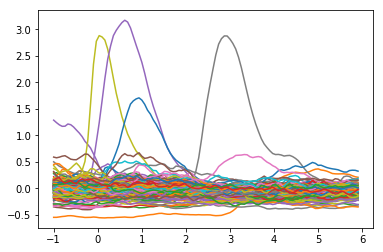

In [82]:
# plt.plot(timestamps, np.nanmean(cat_trials, 2).T)
print(np.shape(ensure_pop_vec))
x1 = plt.plot(timestamps, avg_resp.T)

### get mean response for a day to the FC for all neurons (triggered traces)

In [83]:
# loop through runs on a particular day
all_trials = []
cs = 'plus'
for run in d.runs():

    # get your t2p object
    t2p = run.trace2p()

    # get your cell# from xday alignment
    # use to index along axis=0 in cstraces/run_traces
    cell_ids = flow.xday._read_crossday_ids(run.mouse, run.date)
    cell_ids = [int(s) for s in cell_ids]

    # trigger all trials around stimulus onsets
    run_traces = utils.getcstraces(run, cs=cs, trace_type=trace_type,
                             start_time=start_time, end_time=end_time,
                             downsample=True, clean_artifacts=clean_artifacts,
                             thresh=thresh, warp=warp, smooth=smooth,
                             smooth_win=smooth_win)

    # make timestamps, downsample is necessary
    timestep = 1/t2p.d['framerate']
    timestamps = np.arange(start_time, end_time, timestep)

    if (t2p.d['framerate'] > 30) and downsample:
        timestamps = timestamps[::2][:np.shape(run_traces)[1]]
        
    all_trials.append(run_traces)

cat_trials =  np.concatenate(all_trials, axis=2)
neuro_avg_resp = np.nanmean(cat_trials, 2)

(254, 108)


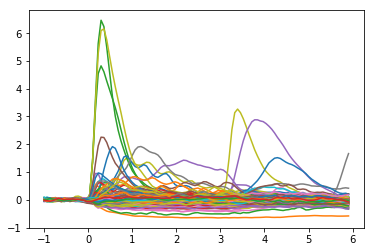

In [84]:
x2 = plt.plot(timestamps, neuro_avg_resp.T)
print(np.shape(neuro_avg_resp))

### get sliding cosine distance for ensure vec compared to different timepoint across cue

In [85]:

cosdist = []
for step in range(len(timestamps)):
    cosdist.append(cosine(neuro_avg_resp[:,step].flatten(), ensure_pop_vec))

(108,)

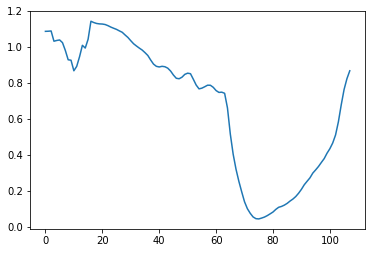

In [86]:
plt.plot(cosdist)
np.shape(cosdist)

In [87]:
dates = flow.metadata.DateSorter.frommeta(mice=[mouse])
d = dates[10]

cosdist_per_day = []
day_num = []
# loop through all days for a mouse, build and save pandas df
for count, d in enumerate(dates):

    # loop through runs on a particular day
    all_trials = []
    cs = 'ensure'
    for run in d.runs():

        # get your t2p object
        t2p = run.trace2p()

        # get your cell# from xday alignment
        # use to index along axis=0 in cstraces/run_traces
        cell_ids = flow.xday._read_crossday_ids(run.mouse, run.date)
        cell_ids = [int(s) for s in cell_ids]

        # trigger all trials around stimulus onsets
        run_traces = utils.getcstraces(run, cs=cs, trace_type=trace_type,
                                 start_time=start_time, end_time=end_time,
                                 downsample=True, clean_artifacts=clean_artifacts,
                                 thresh=thresh, warp=warp, smooth=smooth,
                                 smooth_win=smooth_win)

        # make timestamps, downsample is necessary
        timestep = 1/t2p.d['framerate']
        timestamps = np.arange(start_time, end_time, timestep)

        if (t2p.d['framerate'] > 30) and downsample:
            timestamps = timestamps[::2][:np.shape(run_traces)[1]]

        all_trials.append(run_traces)

    cat_trials =  np.concatenate(all_trials, axis=2)
    avg_resp = np.nanmean(cat_trials, 2)
    ensure_pop_vec = np.mean(avg_resp[:, ((timestamps >= 0) & (timestamps < 1))], 1)

    # loop through runs on a particular day
    all_trials = []
    cs = 'plus'
    for run in d.runs():

        # get your t2p object
        t2p = run.trace2p()

        # get your cell# from xday alignment
        # use to index along axis=0 in cstraces/run_traces
        cell_ids = flow.xday._read_crossday_ids(run.mouse, run.date)
        cell_ids = [int(s) for s in cell_ids]

        # trigger all trials around stimulus onsets
        run_traces = utils.getcstraces(run, cs=cs, trace_type=trace_type,
                                 start_time=start_time, end_time=end_time,
                                 downsample=True, clean_artifacts=clean_artifacts,
                                 thresh=thresh, warp=warp, smooth=smooth,
                                 smooth_win=smooth_win)

        # make timestamps, downsample is necessary
        timestep = 1/t2p.d['framerate']
        timestamps = np.arange(start_time, end_time, timestep)

        if (t2p.d['framerate'] > 30) and downsample:
            timestamps = timestamps[::2][:np.shape(run_traces)[1]]

        all_trials.append(run_traces)

    cat_trials =  np.concatenate(all_trials, axis=2)
    neuro_avg_resp = np.nanmean(cat_trials, 2)
    
    cosdist = []
    for step in range(len(timestamps)):
        cosdist.append(cosine(neuro_avg_resp[:,step].flatten(), ensure_pop_vec))
        
    cosdist_per_day.append(cosdist)
    day_num.append(count)

/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice


In [88]:
shapely = [np.reshape(s, (1, len(s))) for s in cosdist_per_day]
cat_day = np.concatenate(shapely, 0)
np.shape(cat_day)

(53, 108)

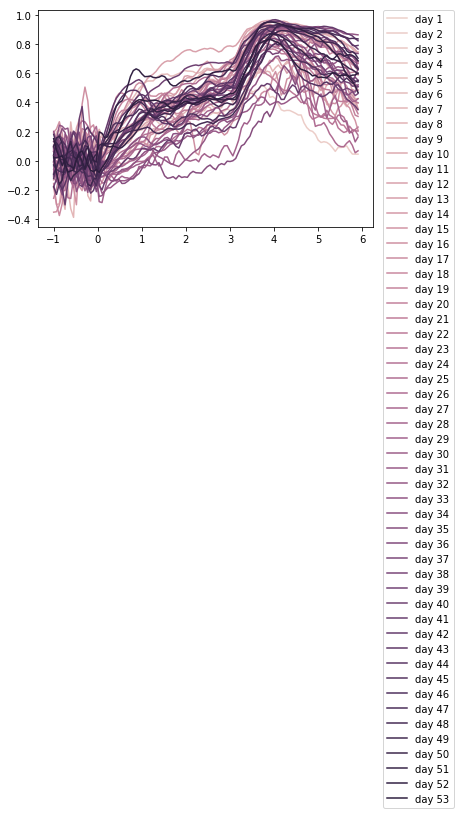

In [90]:
plt.figure()
cmap = sns.cubehelix_palette(len(cat_day))
# cmap = sns.cubehelix_palette(10)
for c, i in enumerate(range(len(cat_day))):
    plt.plot(timestamps, (cat_day[i]*-1)+1, label=('day ' + str(day_num[i]+1)), color=cmap[c])
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

In [57]:
cosine(np.arange(100), np.arange(100,0,-1))

0.500018750820355

#### Maybe try this on GLM reconstructed data to remove other varions in behavior etc. Should also try aligning this using dprime rather than absolute day